In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To visualise the molecules, you need RDKit. Install via 
>conda install -c conda-forge rdkit

In [5]:
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw


You may also need to install an engine to read the xlsx file, 'openpyxl'
>conda install openpyxl

In [8]:
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", engine='openpyxl', verbose=False)
print(sol.shape)
print(sol.columns)


(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


Look at an example, the first data sample

In [120]:
for i in range(len(sol.iloc[0])):
    print(sol.columns[i], sol.iloc[0][sol.columns[i]])

0 1
Compound_Identifier HU_100
Source Huuskonen
SMILES c1ccc2ccc3nccnc3c2c1
LogS.M. -2.68
MW 180.22
AMW 8.192
Sv 15.623
Se 21.854
Sp 16.296
Si 24.242
Mv 0.71
Me 0.993
Mp 0.741
Mi 1.102
nAT 22
nSK 14
nBT 24
nBO 16
nBM 16
SCBO 24.0
RBN 0
RBF 0.0
nDB 0
nTB 0
nAB 16
nH 8
nC 12
nN 2
nO 0
nS 0
nF 0
nCL 0
nBR 0
nHM 0
nHet 2
nX 0
H% 36.4
C% 54.5
N% 9.1
O% 0.0
X% 0.0
nCsp3 0
nCsp2 12
nCsp 0
nCIC 3
nCIR 6
TRS 18
Rperim 14
Rbrid 2
MCD 1.0
RFD 0.286
RCI 1.286
NRS 1
NNRS 0.333
nR03 0
nR05 0
nR06 3
nR07 0
nR08 0
nR09 0
nR10 2
nR11 0
nR12 0
nBnz 2
ARR 1.0
D/Dtr03 0.0
D/Dtr05 0.0
D/Dtr06 62.233
D/Dtr07 0.0
D/Dtr08 0.0
D/Dtr09 0.0
D/Dtr10 69.159
D/Dtr11 0.0
D/Dtr12 0.0
ZM1 76
ZM1V 186
ZM1Kup 193.29
ZM1Mad 79.441
ZM1Per 280.68
ZM1MulPer 196.113
ZM2 91
ZM2V 211
ZM2Kup 215.93
ZM2Mad 94.886
ZM2Per 326.1
ZM2MulPer 222.319
ON0 6.333
ON0V 4.067
ON1 3.083
ON1V 1.31
Qindex 13
BBI 22
DBI 1.414
SNar 11.326
HNar 2.211
GNar 2.246
Xt 0.297
Dz 29.0
Ram 4
BLI 0.85
Pol 22
LPRS 50.995
MSD 3.317
SPI 0.0
PJI2 0.75
ECC 76


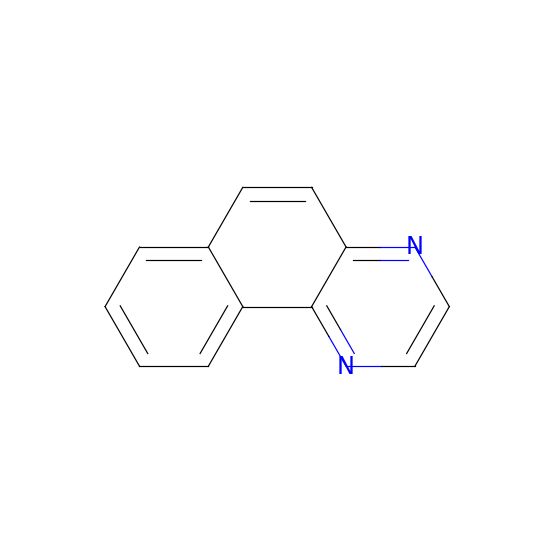

In [80]:
mol = Chem.MolFromSmiles(sol.iloc[0]['SMILES'])
fig = Draw.MolToMPL(mol)
plt.axis('off')
plt.show()

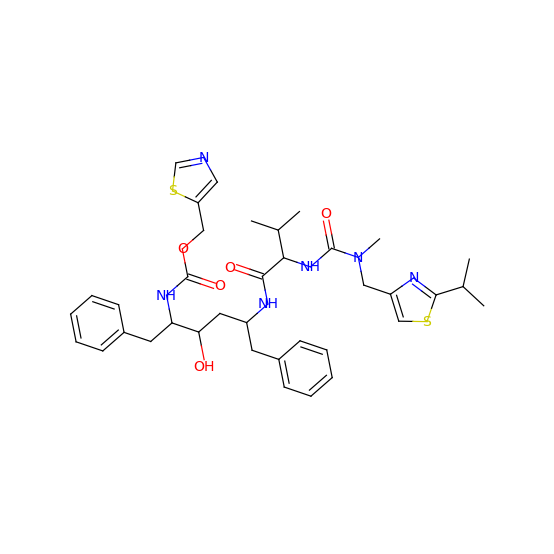

In [81]:
ritonavir = 'CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2=CC=CC=C2)CC(C(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)O'
ritonavir_mol = Chem.MolFromSmiles(ritonavir)
fig = Draw.MolToMPL(ritonavir_mol)
plt.axis('off')
plt.show()

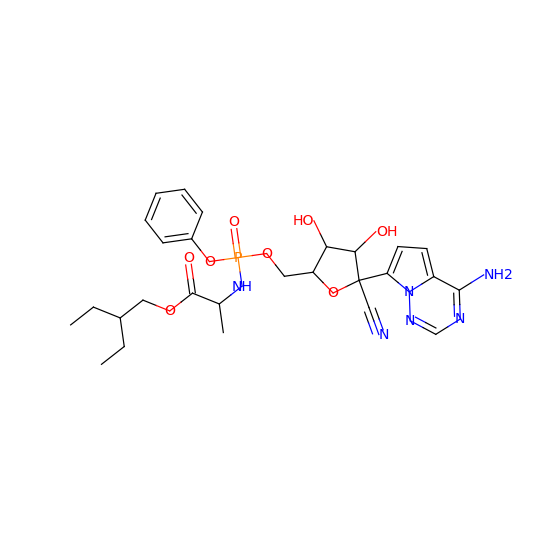

In [82]:
remdesivir = 'CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=CC=C3N2N=CN=C3N)O)O)OC4=CC=CC=C4'
remdesivir_mol = Chem.MolFromSmiles(remdesivir)
fig = Draw.MolToMPL(remdesivir_mol)
plt.axis('off')
plt.show()

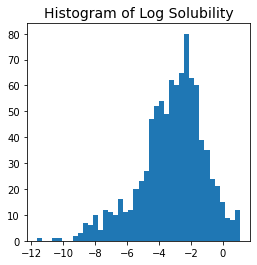

In [83]:
y = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(y, bins=40)
ax.set_title("Histogram of Log Solubility", fontsize=14);

Extract the data we are going to use to do the prediction

In [122]:
X = sol[sol.columns[5:-1]] # getting the relevant data
col_labels = sol.columns[5:-1]
X = X.to_numpy()
N, p = X.shape
print(X.shape)
print(y.shape)

(932, 2255)
(932,)


In [123]:
print(col_labels[:5])

Index(['MW', 'AMW', 'Sv', 'Se', 'Sp'], dtype='object')


Split data up in to train test split

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Regularised L2 regression

Implement using matrix multiplication: 

$ w = (X^T X) + \gamma I X^Ty$

In [125]:
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ y_train
y_hat_train = X_train @ w # gives estimate of results
y_hat_test  = X_test @ w 


Plot training and test predictions

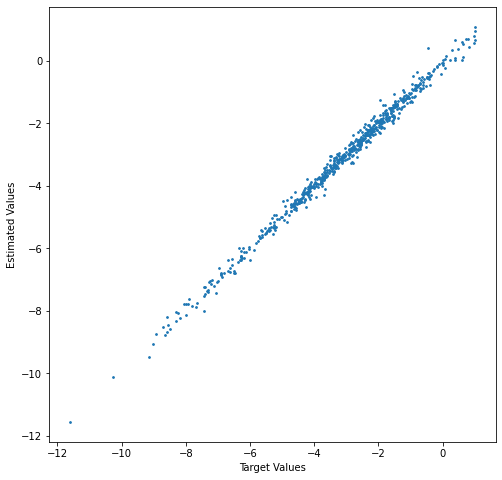

In [126]:
plt.figure(figsize=(8,8))
plt.scatter(y_train, y_hat_train, s=3);
plt.xlabel('Target Values')
plt.ylabel('Estimated Values');

Do the same for the test values. Identify those which don't fit the pattern. 

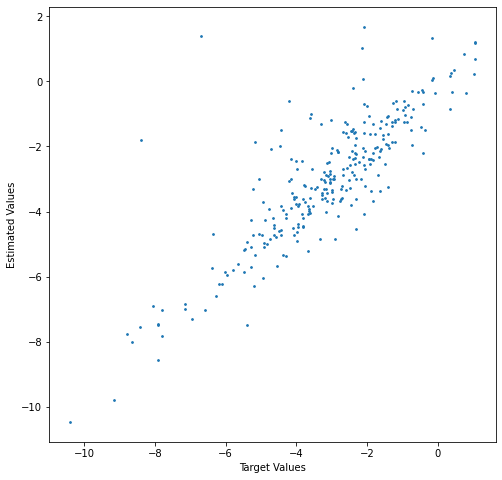

In [127]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_hat_test, s=3);
plt.xlabel('Target Values')
plt.ylabel('Estimated Values');

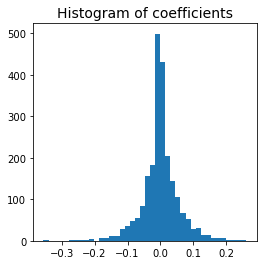

In [128]:
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(w, bins=40)
ax.set_title("Histogram of coefficients", fontsize=14);

In [129]:
diff = y_hat_test - y_test
top_diffs = np.argsort(diff)[-10:]
top_diffs

array([218, 261,  41, 274,  11, 214, 106, 237, 136, 207])

Molecule 218, log_sol -4.53, diff 2.494


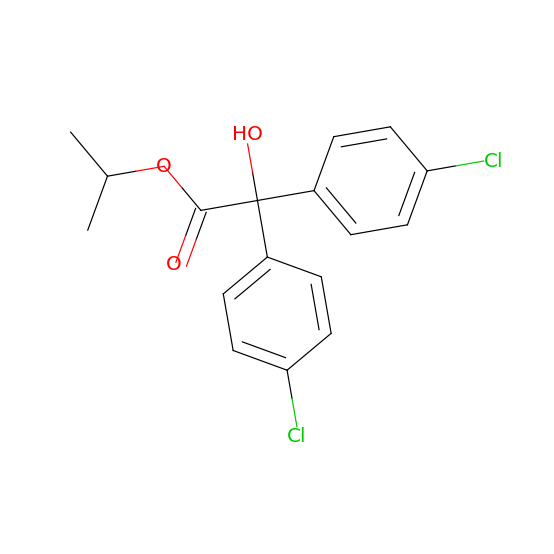

Molecule 261, log_sol -4.65, diff 2.577


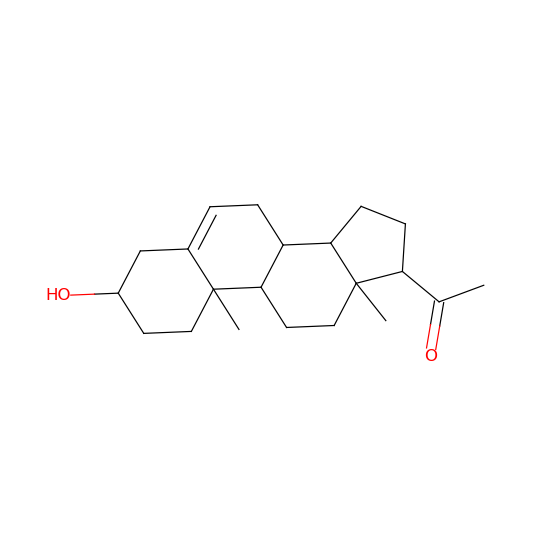

Molecule 41, log_sol -2.33, diff 2.634


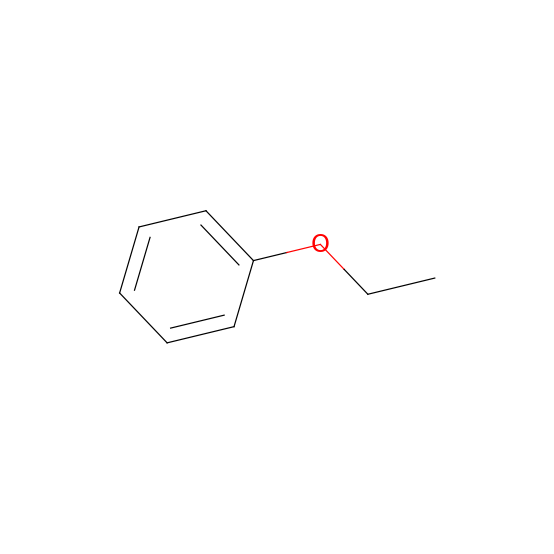

Molecule 274, log_sol -5.15, diff 2.922


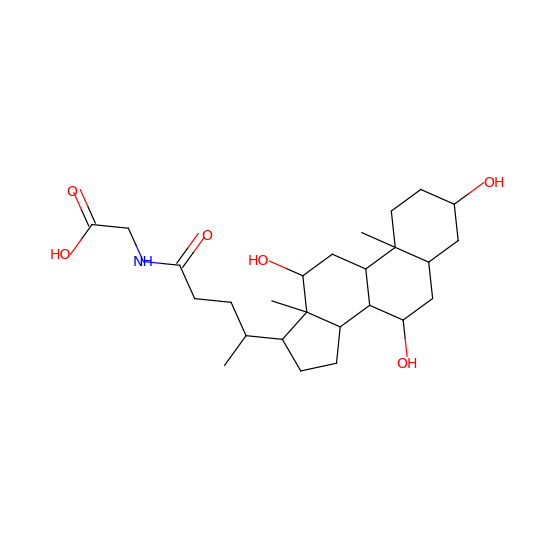

Molecule 11, log_sol -7.42, diff 3.144


[15:45:03] SMILES Parse Error: syntax error while parsing: c1ccc4c(c1)ccc5c3ccc2ccccc2c3n(H)c45
[15:45:03] SMILES Parse Error: Failed parsing SMILES 'c1ccc4c(c1)ccc5c3ccc2ccccc2c3n(H)c45' for input: 'c1ccc4c(c1)ccc5c3ccc2ccccc2c3n(H)c45'


ValueError: Null molecule provided

In [130]:
for ind in top_diffs:
    print(f'Molecule {ind}, log_sol {sol.iloc[ind]["LogS.M."]}, diff {round(diff[ind], 3)}')
    mol = Chem.MolFromSmiles(sol.iloc[ind]['SMILES'])
    fig = Draw.MolToMPL(mol)
    plt.axis('off')
    plt.show()

Now implement L1 regularised regression

In [131]:
from  sklearn.linear_model import Lasso
lr1 = Lasso(alpha=0.1)
lr1.fit(X_train, y_train)
y_hat_train = lr1.predict(X_train)
y_hat_test = lr1.predict(X_test)

/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


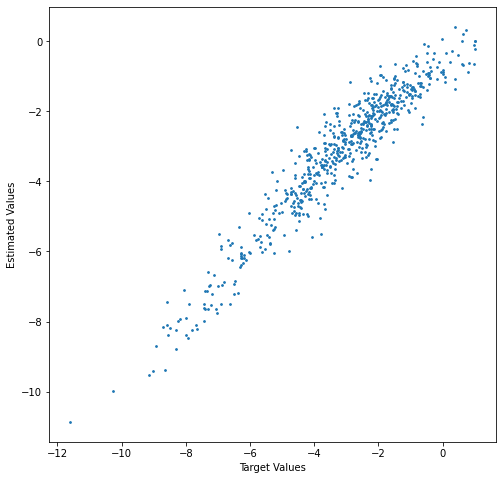

In [132]:
plt.figure(figsize=(8,8))
plt.scatter(y_train, y_hat_train, s=3);
plt.xlabel('Target Values')
plt.ylabel('Estimated Values');

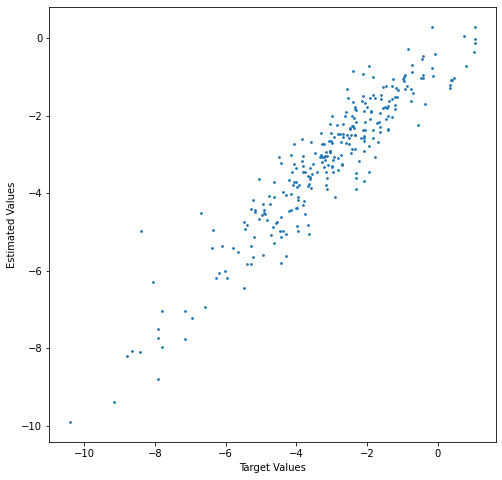

In [133]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_hat_test, s=3);
plt.xlabel('Target Values')
plt.ylabel('Estimated Values');

In [134]:
diff = y_hat_test - y_test
top_diffs = np.argsort(diff)[-10:]
top_diffs

array([212, 189,  62, 132,  42,  32, 186, 239, 207, 136])

Molecule 212, log_sol -2.7, diff 1.237


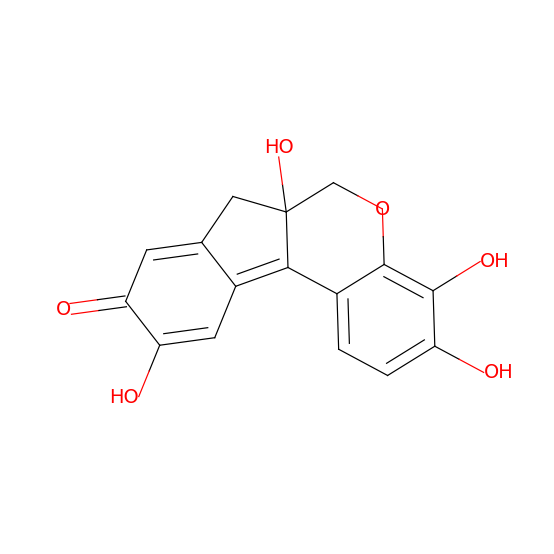

Molecule 189, log_sol -2.64, diff 1.262


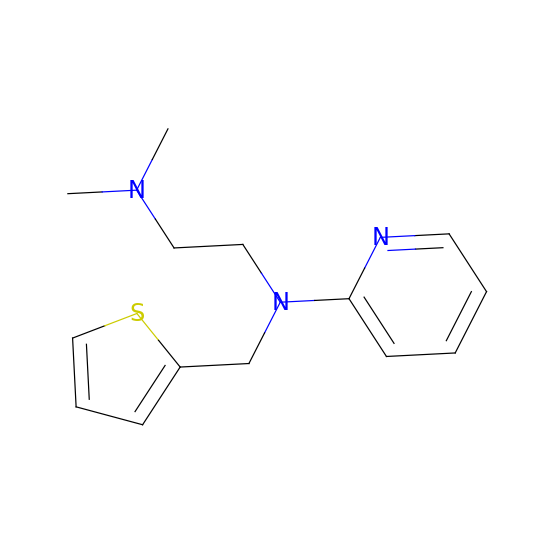

Molecule 62, log_sol -2.23, diff 1.325


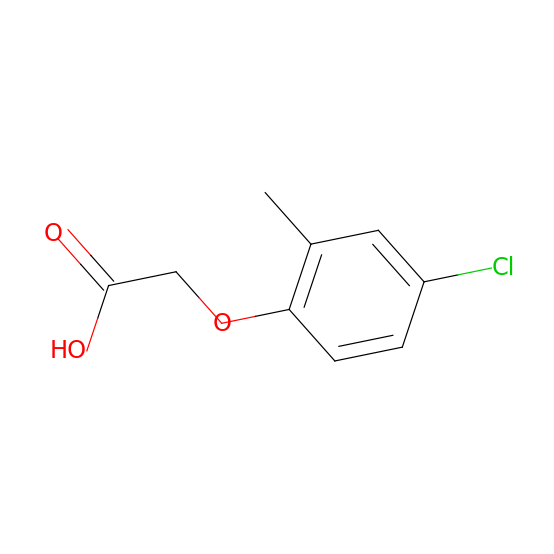

Molecule 132, log_sol -2.3, diff 1.375


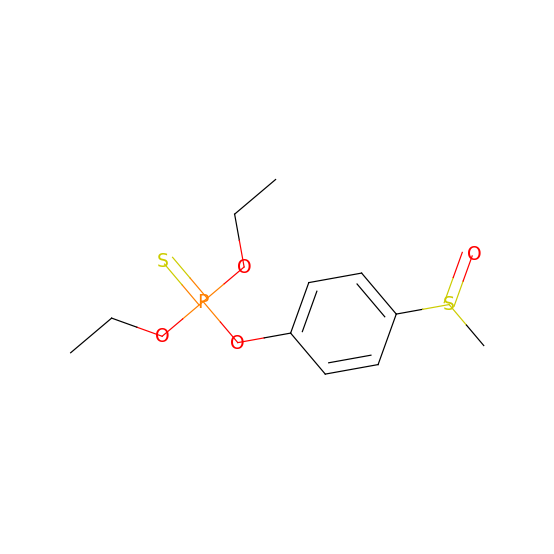

Molecule 42, log_sol -0.27, diff 1.415


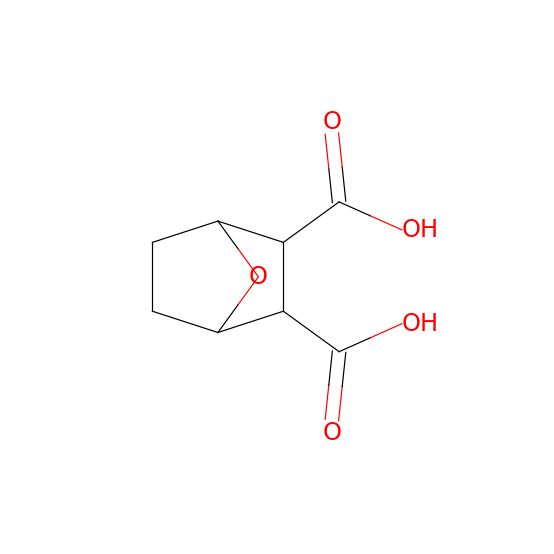

Molecule 32, log_sol -4.22, diff 1.421


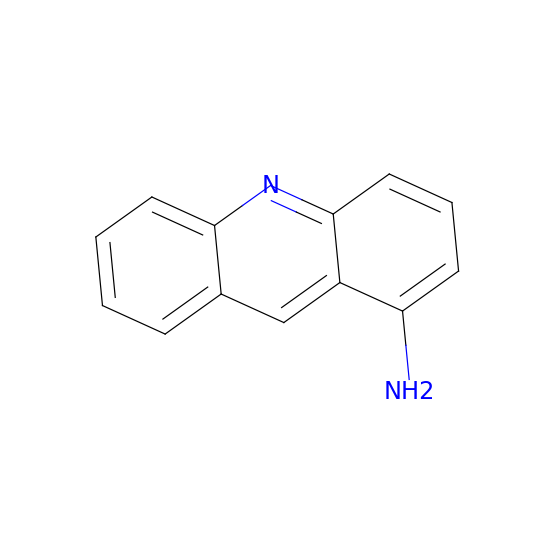

Molecule 186, log_sol -6.34, diff 1.539


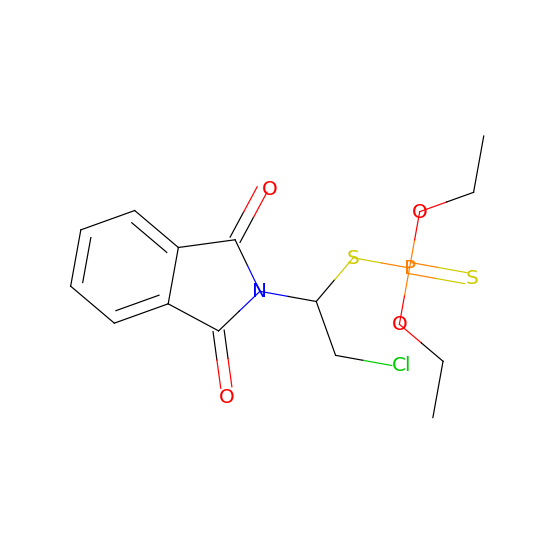

Molecule 239, log_sol -4.22, diff 1.757


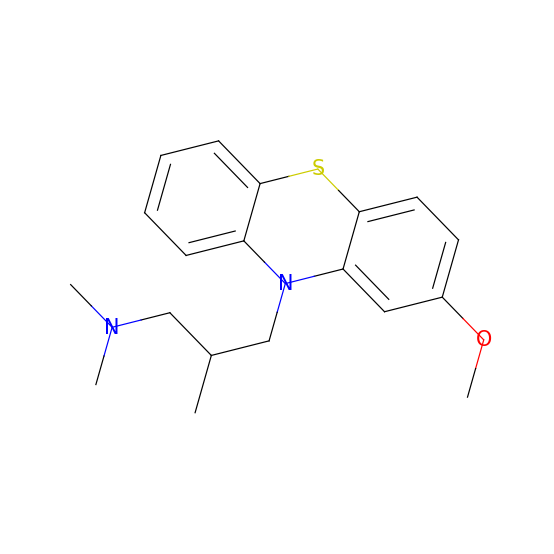

Molecule 207, log_sol -1.6, diff 2.176


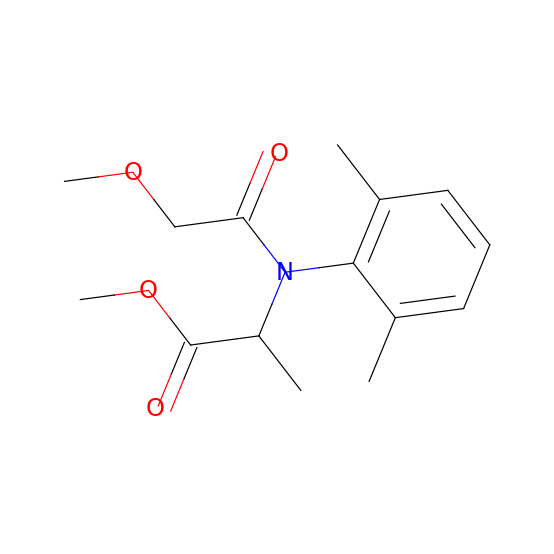

Molecule 136, log_sol -3.4, diff 3.419


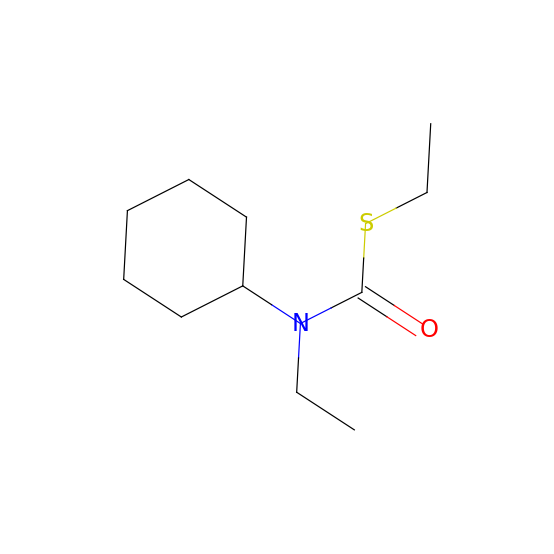

In [135]:
for ind in top_diffs:
    print(f'Molecule {ind}, log_sol {sol.iloc[ind]["LogS.M."]}, diff {round(diff[ind], 3)}')
    mol = Chem.MolFromSmiles(sol.iloc[ind]['SMILES'])
    fig = Draw.MolToMPL(mol)
    plt.axis('off')
    plt.show()

In [136]:
w = lr1.coef_


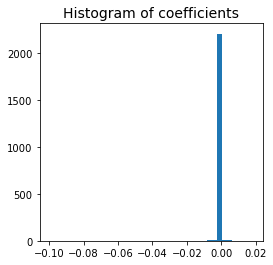

In [137]:
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(w, bins=40)
ax.set_title("Histogram of coefficients", fontsize=14);

In [138]:
col_inds = w.nonzero()

In [139]:
col_labels[col_inds]

Index(['MW', 'N%', 'D/Dtr07', 'D/Dtr09', 'D/Dtr10', 'D/Dtr11', 'D/Dtr12',
       'ZM1V', 'ZM1Kup', 'ZM1MulPer', 'ZM2V', 'ZM2Kup', 'ZM2Per', 'CENT',
       'SMTI', 'SMTIV', 'GMTI', 'GMTIV', 'CSI', 'Wap', 'RDSQ', 'ISIZ', 'IDET',
       'IDMT', 'TIC0', 'TIC1', 'TIC2', 'TIC5', 'Wi_D', 'SpAD_D', 'QW_L',
       'TI1_L', 'Wi_Dt', 'SpAD_Dt', 'Wi_D/Dt', 'H_D/Dt', 'Wi_Dz(Z)',
       'Wi_Dz(v)', 'Wi_Dz(e)', 'Wi_Dz(p)', 'SpAbs_Dz(p)', 'Wi_Dz(i)', 'ATSC4m',
       'ATSC7m', 'ATSC2s', 'ATSC3s', 'ATSC6s', 'ATSC7s', 'ATSC8s',
       'P_VSA_LogP_1', 'P_VSA_LogP_2', 'P_VSA_LogP_3', 'P_VSA_LogP_4',
       'P_VSA_LogP_6', 'P_VSA_LogP_7', 'P_VSA_LogP_8', 'P_VSA_MR_1',
       'P_VSA_MR_6', 'P_VSA_MR_7', 'P_VSA_m_1', 'P_VSA_v_1', 'P_VSA_v_3',
       'P_VSA_e_2', 'P_VSA_i_3', 'P_VSA_s_2', 'P_VSA_s_3', 'P_VSA_s_4',
       'P_VSA_s_5', 'Chi0_EA(dm)', 'SM05_AEA(ri)', 'Eig10_EA(ed)', 'H-046',
       'CATS2D_01_LL', 'CATS2D_02_LL', 'T(N..O)', 'T(O..O)', 'T(O..F)',
       'T(Cl..Cl)', 'AMR', 'MLOGP2', 'SAtot', 'SAd

In [142]:
coeffs = []
alphas = np.arange(0.5,40,0.5)
for alpha in alphas:
    lr1 = Lasso(alpha=alpha)
    lr1.fit(X_train, y_train)
    w = lr1.coef_
    col_inds = w.nonzero()[0]
#     print(col_inds)
    print(alpha, len(col_inds))
#     print(col_labels[col_inds])
    coeffs.append(col_inds)

/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


0.5 40


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.061e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


1.0 29


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.957e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


1.5 27


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.957e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


2.0 24


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


2.5 20


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


3.0 19


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.001e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


3.5 21


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


4.0 18


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.579e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


4.5 18


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.401e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


5.0 18


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.007e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


5.5 18


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


6.0 17


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


6.5 15


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+02, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


7.0 14


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.297e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


7.5 13


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.786e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


8.0 13


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


8.5 13


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


9.0 12


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.103e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


9.5 12


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.169e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


10.0 10


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.369e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


10.5 10


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.243e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


11.0 10


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.550e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


11.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


12.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


12.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


13.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.094e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


13.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.126e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


14.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.473e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


14.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.032e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


15.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.756e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


15.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.561e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


16.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.416e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


16.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.327e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


17.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.270e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


17.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.233e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


18.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.228e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


18.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.261e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


19.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.329e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


19.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.449e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


20.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


20.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.867e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


21.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.203e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


21.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.649e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


22.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.242e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


22.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


23.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


23.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


24.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.353e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


24.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.633e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


25.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


25.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


26.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.026e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


26.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.419e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


27.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


27.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


28.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


28.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.276e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


29.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+01, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


29.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.950e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


30.0 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.219e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


30.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.658e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


31.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.302e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


31.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.954e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


32.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.613e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


32.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.279e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


33.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.952e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


33.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.632e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


34.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.528e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


34.5 9


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.311e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


35.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.472e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


35.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.452e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


36.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.914e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


36.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.563e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


37.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


37.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.914e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


38.0 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.613e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


38.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


39.0 8
39.5 8


/Users/jojo/anaconda3/envs/mlhack/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+00, tolerance: 2.698e-01
  model = cd_fast.enet_coordinate_descent(


In [144]:
coeffs

[array([  63,   66,   67,   68,   72,   80,  106,  109,  110,  111,  112,
         114,  115,  232,  250,  318,  397,  411,  429,  548,  587,  910,
         914, 1132, 1133, 1136, 1137, 1138, 1140, 1153, 1155, 1165, 1171,
        1248, 1640, 1837, 1851, 1863, 2217, 2223]),
 array([  63,   73,   80,  106,  109,  110,  111,  112,  114,  115,  232,
         250,  397,  411,  429,  517,  579,  587,  914, 1132, 1133, 1136,
        1137, 1138, 1153, 1155, 2217, 2221, 2223]),
 array([   0,   80,  106,  110,  111,  112,  114,  115,  232,  250,  397,
         411,  429,  517,  579,  914, 1132, 1133, 1136, 1137, 1138, 1153,
        1155, 1161, 2217, 2221, 2223]),
 array([   0,   80,  109,  110,  111,  112,  114,  115,  232,  250,  397,
         411,  429,  517,  579,  914, 1133, 1137, 1138, 1153, 1161, 2217,
        2221, 2223]),
 array([   0,  109,  110,  111,  112,  114,  115,  232,  250,  397,  411,
         429,  517,  579, 1133, 1137, 1138, 1153, 1161, 2223]),
 array([ 109,  110,  111,  112

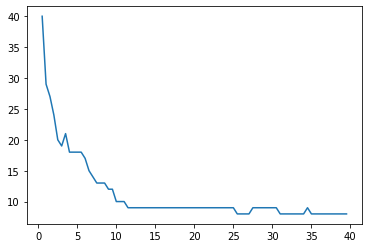

In [148]:
coeff_nos = [len(x) for x in coeffs]
plt.plot(alphas, coeff_nos)

In [149]:
col_labels[coeffs[-1]]

Index(['SMTI', 'GMTI', 'GMTIV', 'Wap', 'IDMT', 'Wi_Dt', 'Wi_Dz(p)',
       'P_VSA_v_3'],
      dtype='object')

* SMTI = Schultz Molecular Topological index
* GMTI = Gutman Molecular Topological index
* GMTIV = Gutman Molecular Topological index by valence vertex degrees
* Wap = All path Weiner index
* IDMT = Total Information Content index on the distance magnitude
* Wi_DT = Weiner-like index from detour matrix (detour index)
* Wi_DZ = Wiener-like index from Barysz matrix weighted by atomic number
* P_VSA_v_3 = P_VSA-like on van der Waals volume, bin 3

In [155]:
#Correlation matrix
import seaborn as sns
df_small = sol.iloc[  63,   66,   67,   68,   72,   80,  106,  109,  110,  111,  112,
         114,  115,  232,  250,  318,  397,  411,  429,  548,  587,  910,
         914, 1132, 1133, 1136, 1137, 1138, 1140, 1153, 1155, 1165, 1171,
        1248, 1640, 1837, 1851, 1863, 2217, 2223]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)
plt.show()

IndexingError: Too many indexers

In [ ]:
'\"?;."'